# Using Clebsch-Gordan coefficients

Writing a Lagrangian term using its mathematical expression with contracted indices may not be possible in some situtations. This will often be the case when working with large gauge groups (*i.e.* GUTs) or higher-dimensional representations of some common gauge groups (*e.g.* sextets under $SU(3)$).  

The module **PyLie**, introduced in PyR@TE 2, was designed to handle various group theory related computations. One of its useful functionalities is to compute the Clebsch-Gordan coefficients for an arbitrary set of 2, 3, or 4 representations of a given Lie algebra. These coefficients contain information on the way to contract gauge multiplets in order to yield gauge invariant quantities.  

Altough a lot of efforts were put in the improvement of the performances of this module in PyR@TE 3, the computation of gauge invariants may be in some cases quite time-consuming. Therefore, in the same spirit as in PyR@TE 2, a database was designed to store the results of these computations, allowing PyR@TE to access them at any later time without computing them again. A dedicated module was written to interact with PyLie and its database in a simple and intuitive way. The next section of this notebook exlpains how to interact with PyLie ; the CGCs themselves are discussed a bit later.

## Interacting with PyLie's database
**Disclaimer**: PyLie's functions as well as available functions to interact with PyLie's database are still ongoing improvements and changes. This notebook will therefore be updated in the future.

First, let's get into PyLie's main directory (located in `/src/PyLie` from PyR@TE's directory) :

In [ ]:
%cd .../PyR@TE_3/src/PyLie

Let's import the PyLieDB class and load the database (DB) with the `.load()` function. When we are done working with the DB, we must systematically close it using the `.close()` method.

In [2]:
from PyLieDB import PyLieDB

# Create an instance of the Database object
db = PyLieDB()

# Make sure it is closed first
db.close()

# Load it
db.load()

The content of the DB can be printed at any time calling `db.visit()`, or, equivalently, `print(db)`. The argument `shorter=True` can be provided if we do not want to display the whole content of the contained matrices and tensors.

In [3]:
db.visit(shorter=True)

Content of the DB (unzipped size = 61.39kB):

E8
   /adjointrep : [0 0 0 0 0 0 1 0]
   /cartanmatrix
      /k : [[0 0]
            [0 1]
            [1 0]
            ...
            [6 6]
            [7 2]
            [7 7]]
      /s : [8 8]
      /v : [b'2' b'-1' b'-1' ... b'2' b'-1' b'2']
   /dimension : 248
   /fullname : E8
   /name : E8
   /rank : 8

G2
   /adjointrep : [1 0]
   /cartanmatrix
      /k : [[0 0]
            [0 1]
            [1 0]
            [1 1]]
      /s : [2 2]
      /v : [b'2' b'-3' b'-1' b'2']
   /dimension : 14
   /fullname : G2
   /name : G2
   /rank : 2

SO10
   /adjointrep : [0 1 0 0 0]
   /cartanmatrix
      /k : [[0 0]
            [0 1]
            [1 0]
            ...
            [3 3]
            [4 2]
            [4 4]]
      /s : [5 5]
      /v : [b'2' b'-1' b'-1' ... b'2' b'-1' b'2']
   /dimension : 45
   /fullname : SO10
   /name : D5
   /rank : 5

SU2
   /adjointrep : [2]
   /cartanmatrix
      /k : [[0 0]]
      /s : [1 1]
      /v : [b'2']
  

### Getting information from the DB 

Before discussing the CGCs, let us try and get some information about the gauge groups. Here and after, the standard way to ask some DB some information is the method `.get(Group, Type of info, [Arguments, [Keyword arguments]])`. If the information is not already present in the DB, it will be automatically computed and stored.

In [4]:
print('SU2 dimension : ', db.get('SU2', 'dimension'))
print('SO10 dimension: ', db.get('SO10', 'dimension'))
print('SU3 rank : ', db.get('SU3', 'rank'))
print('SU5 adjoint representation :', db.get('SU5', 'adjoint'))
print('E8 dimension and rank : ', (db.get('E8', 'dimension'), db.get('E8', 'rank')))
print('G2 cartan matrix :', db.get('G2', 'cartan'))

print('\n\nSU2 structure constants:')
print(db.get('SU2', 'structureConstants'))

SU2 dimension :  3
SO10 dimension:  45
SU3 rank :  2
SU5 adjoint representation : [1, 0, 0, 1]
E8 dimension and rank :  (248, 8)
G2 cartan matrix : Matrix([[2, -3], [-1, 2]])


SU2 structure constants:
[Matrix([
[0,  0, 0],
[0,  0, 1],
[0, -1, 0]]), Matrix([
[0, 0, -1],
[0, 0,  0],
[1, 0,  0]]), Matrix([
[ 0, 1, 0],
[-1, 0, 0],
[ 0, 0, 0]])]


#### Gauge generators

Another useful information is the expression of the generators of a given representation of a gauge group. We will refer to them as 'representation matrices'.

In [5]:
# Load sympy's printing system in order to get good-looking output
from sympy import init_session

init_session(quiet=True)

The standard way to get representation matrices is to call `.get(Group, 'repMatrices', [representation])` where `[representation]` refers to the dynkin labels of a given representation of the group. If you are not used to Dynkin labels but rather to the common Particle Physics notation based on the dimension of the representation (*e.g.* $\mathbf{2}$ or $\bar{\mathbf{3}}$), you may call the method `.get(Group, 'labels', [representation])` :

In [6]:
print('SU2 2-dimensional rep : ', db.get('SU2', 'labels', 2))
print('SU3 conjugated 3-dimensional rep : ', db.get('SU3', 'labels', -3))

SU2 2-dimensional rep :  [1]
SU3 conjugated 3-dimensional rep :  [0, 1]


Note that it may happen that several representations have the same dimension :

In [7]:
db.get('SU3', 'labels', 15)

Now let's ask for the generators of the representations $\mathbf{2}$ of $SU(2)$ and $\mathbf{3}$ of $SU(3)$ :

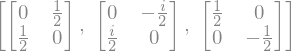

In [8]:
db.get('SU2', 'repMatrices', [1]) # We expect the Pauli matrices to show up ...

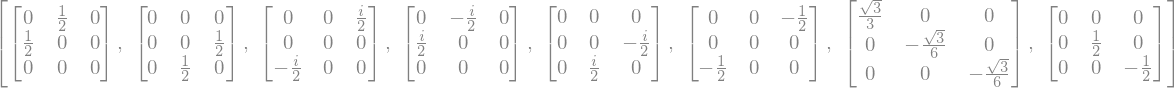

In [9]:
db.get('SU3', 'repMatrices', [1,0]) # We expect the Gell-Mann matrices to show up ...

The Pauli matrices did show up in the first case, but the second output does not match the usual expression for the Gell-Mann matrices (altough it looks similar). This brings us to an important remark :   
<br>
<center><span style="font-size:larger;"> The explicit form of the generators of a representation is not uniquely defined. For a given representation, there exists infinitely many sets of gauge generators satisfying the commutation relations of the Lie algebra. Some quantities, such as the CGCs, depend in general on the choice of the generators. </span></center>

## Using Clebsch-Gordan coefficients to build a Lagrangian

### Introductory example

#### 1. Compute the CGCs

Let's begin the discussion with a simple example. We consider two fields transforming respectively in the representations $\bar{\mathbf{2}}$ and $\mathbf{2}$ of $SU(2)$. Somehow, we forgot how to contract these two fields in a gauge singlet (it sure has been a long day). We simply have to get the CGCs for this combination of fields, calling as usual the `.get()` method with the keyword `'invariants'` (or equivalently `cgc`, `cgcs`, `inv`, `invs`) :

In [10]:
db.get('SU2', 'invariants', [[1, True], [1]])

[a[1]*b[1] + a[2]*b[2]]

 -- **Remark**: Since $\mathbf{2}$ of $SU(2)$ is a pseudo-real representation, it is equivalent to its conjugate representation $\bar{\mathbf{2}}$ and therefore both have the same Dynkin labels. In this case the conjugate repreentation is obtained by appending `True` to the list of Dynkin labels.] --

The output is a list containing only one element ; meaning that there is only one way to get a gauge singlet out of these two fields.

#### 2. Use CGCs in the model file

We now want to build a Lagrangian using the invariant identified above. Before going further, we note that this invariant can be rewritten in the form  

\begin{equation}
    I = a_1 b^1 + a_2 b^2 \equiv C^i_{\ j}\, a_i b^j \,.
\end{equation}

This is the general formulation of CGCs that we will use in the model file.

The first step is to define the tensor `C`, in the `Definitions` section of the model file. There are two ways to proceed, using the keyword `cgc( ... )` :
- `C : cgc(SU2, [[1], [1,True]], 0)` asks PyR@TE to compute the invariant combinations from the product $\bar{\mathbf{2}} \otimes \mathbf{2}$ of $SU(2)$, and to take the first one (`0` stand for the first element of the Python list). The last argument is optional in this case, since `cgc('group', 'reps')` will always pick up the first invariant returned by PyLie.
- `C : cgc(SU2L, Hbar, H)` asks PyR@TE the invariant combination of the fields $H^\dagger$ and $H$ under the group named `SU2L`. This equivalent formulation requires of course that all the quantities were defined earlier in the model file. Here $H$ stands for the Higgs doublet of the Standard Model.  

Now we can use the tensor `C` to express the Higgs mass coupling (under `ScalarMasses` in the model file) : `mu : C[i,j] Hbar[i] H[j]`.  
We could also have used a different normalization, for instance : `mu : 1/2 * C[i,j] Hbar[i] H[j]`

#### 3. Invariant combinations of fields carrying more than one index

Things get more complicated when fields carry several indices (i.e. are charged under several non-abelian gauge factors), still the generalization is straightforward. Let us consider the down-type quark Yukawa coupling of the standard model : (flavour indices are kept implicit)  

\begin{equation}
    -\mathcal{L} \supset Y_d\, \bar{Q}_{i a} H^i d_R^a
\end{equation}

One way of understanding this term is to consider that we are taking the product of three representations of the semi-simple gauge group $SU(2)\times SU(3)$, that is : $(\bar{\mathbf{2}},\bar{\mathbf{3}})\otimes(\mathbf{2}, \mathbf{1})\otimes(\mathbf{1}, \mathbf{3})$. Since the `invariants` function only works with simple algebras, we will rather consider that two contractions happen simultaneously here: $\bar{\mathbf{2}}\otimes\mathbf{2}\otimes\mathbf{1} = \bar{\mathbf{2}}\otimes\mathbf{2}$ under $SU(2)$ and $\bar{\mathbf{3}}\otimes\mathbf{1}\otimes\mathbf{3} = \bar{\mathbf{3}}\otimes\mathbf{3}$ under $SU(3)$. We must therefore define two invariant tensors to build this term :
- `C1 : cgc(SU2, [[1,True], [1]])`
- `C2 : cgc(SU3, [[0,1], [1,0]])`

$\Rightarrow$ `Yd : C1[i,j]*C2[a,b]*Qbar[a,i] H[j] dR[b]`   

Of course, in this example, the invariant tensors are nothing more than Kronecker deltas, so we could as well have written `Yd : Qbar[a,i] H[i] dR[a]`.

### A concrete (and more useful) example

In the examples above, we had the choice not to use the CGCs, and instead directly contract the various indices. In some other cases, this simple formulation will not allow the user to write a given gauge-invariant combination of fields.  

To illustrate this, let us take the example of $SU(5)$, with the following particle content :
- Two fermions :  $\psi_5 \in \bar{\mathbf{5}}$  and  $\psi_{10} \in \mathbf{10}$
- One complex scalar :  $\phi_5 \in \mathbf{5}$

#### Introduction to the `repProduct` function

Two Yukawa couplings can be constructed out of these three fields. To see this, we can use one of PyLie's functions, `repProduct` :

In [11]:
# 1. What are the dynkin labels of 5, 5bar and 10 ?
print("Dynkin labels of 5 and 5bar : ", db.get('SU5', 'labels', 5), 'and', db.get('SU5', 'labels', -5))
print("Dynkin labels of 10 : ", db.get('SU5', 'labels', 10))

Dynkin labels of 5 and 5bar :  [1, 0, 0, 0] and [0, 0, 0, 1]
Dynkin labels of 10 :  [0, 1, 0, 0]


In [12]:
# 2. Let's first see what comes out of the product 5 * 5bar
db.get('SU5', 'repProduct', [[1,0,0,0], [0,0,0,1]], iLatex=True)

The output means that $\mathbf{5}\otimes\bar{\mathbf{5}} = \mathbf{24} \oplus \mathbf{1}$. The fact that the decomposition contains the trivial representation $\mathbf{1}$ means that we may construct one (and only one) gauge singlet out of the representations $\mathbf{5}$ and $\bar{\mathbf{5}}$.  
Now, playing with the representation $\mathbf{10}$ as well, we find two possible ways of generating the trivial representation :

In [13]:
# 5bar*10*5bar
db.get('SU5', 'repProduct', [[0,0,0,1], [0,1,0,0], [0,0,0,1]], iLatex=True)

In [14]:
# 5*10*10
db.get('SU5', 'repProduct', [[1,0,0,0], [0,1,0,0], [0,1,0,0]], iLatex=True)

#### Building the Yukawa Lagrangian

The first term that we may construct is $\psi_5\, \phi_5^\dagger\, \psi_{10}$. Let's try to get the corresponding CGCs :

In [15]:
db.get('SU5', 'invariants', [[0,0,0,1], [0,0,0,1], [0,1,0,0]])

[a[1]*b[2]*c[1] + a[1]*b[3]*c[2] + a[1]*b[4]*c[3] + a[1]*b[5]*c[4] - a[2]*b[1]*c[1] + a[2]*b[3]*c[5] + a[2]*b[4]*c[6] + a[2]*b[5]*c[7] - a[3]*b[1]*c[2] - a[3]*b[2]*c[5] + a[3]*b[4]*c[8] + a[3]*b[5]*c[9] - a[4]*b[1]*c[3] - a[4]*b[2]*c[6] - a[4]*b[3]*c[8] + a[4]*b[5]*c[10] - a[5]*b[1]*c[4] - a[5]*b[2]*c[7] - a[5]*b[3]*c[9] - a[5]*b[4]*c[10]]

Clearly, we wouldn't have been able to produce this term using index contractions. In the model file we may define the previous invariant as `C5 : cgc(SU5, [[0,0,0,1], [0,0,0,1], [0,1,0,0]])` then use it in the definition of the Yukawa term : `Y5 : C5[i,j,k] * psi5[i] phi5bar[j] psi10[k]`

For the second term, $\psi_{10}\, \phi_5\, \psi_{10}$, we get :

In [16]:
db.get('SU5', 'invariants', [[0,1,0,0], [1,0,0,0], [0,1,0,0]])

[a[10]*b[1]*c[5] - a[10]*b[2]*c[2] + a[10]*b[3]*c[1] + a[1]*b[3]*c[10] - a[1]*b[4]*c[9] + a[1]*b[5]*c[8] - a[2]*b[2]*c[10] + a[2]*b[4]*c[7] - a[2]*b[5]*c[6] + a[3]*b[2]*c[9] - a[3]*b[3]*c[7] + a[3]*b[5]*c[5] - a[4]*b[2]*c[8] + a[4]*b[3]*c[6] - a[4]*b[4]*c[5] + a[5]*b[1]*c[10] - a[5]*b[4]*c[4] + a[5]*b[5]*c[3] - a[6]*b[1]*c[9] + a[6]*b[3]*c[4] - a[6]*b[5]*c[2] + a[7]*b[1]*c[8] - a[7]*b[3]*c[3] + a[7]*b[4]*c[2] + a[8]*b[1]*c[7] - a[8]*b[2]*c[4] + a[8]*b[5]*c[1] - a[9]*b[1]*c[6] + a[9]*b[2]*c[3] - a[9]*b[4]*c[1]]

And we will add the definition `C10 : cgc(SU5, [0,1,0,0], [1,0,0,0], [0,1,0,0]])` along with the Yukawa coupling `Y10 : C10[i,j,k] psi10[i] phi5[j] psi10[k]`

In [17]:
# Close the DB eventually
db.close()